In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

In [2]:
num_qubits = 3
num_layers = 3

phis = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*10)
thetas = np.zeros((num_layers*num_qubits*3))

In [6]:
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, phis, num_layers = 2)

thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 200, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_l,
    loss_func = qtm.base_qtm.loss_basis,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 200/200 [15:02<00:00,  4.51s/it]


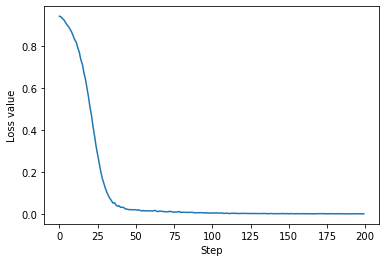

In [7]:
plt.show()
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [9]:
# Get statevector from circuit
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
psi_hat = qiskit.quantum_info.Statevector(qtm.base_qtm.get_u_hat(
    thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    num_qubits = qc.num_qubits,
    num_layers = num_layers
))
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics

trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.0269419914671759
Fidelity:  (0.9992741291023817-6.628057477864324e-13j)


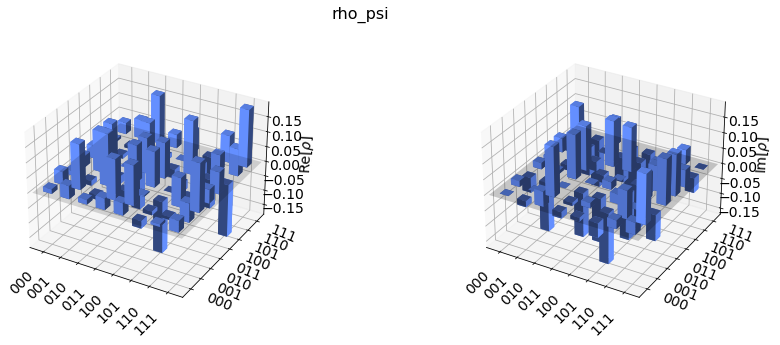

In [10]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

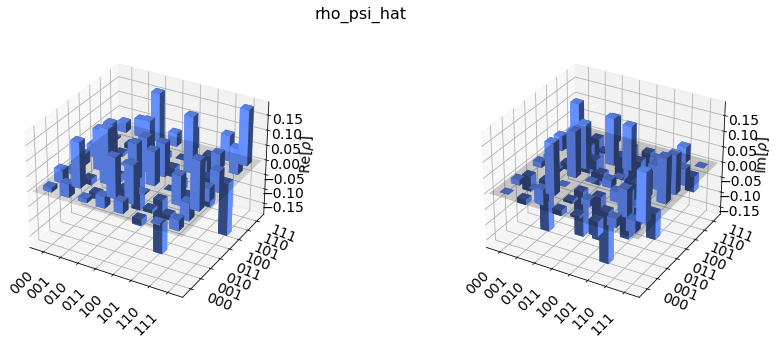

In [11]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')

In [16]:
qc1 = qc.copy()
qc1.barrier()
qc1 = qtm.qtm_nqubit.u_cluster_nlayer_nqubit(qc1, thetas, num_layers)


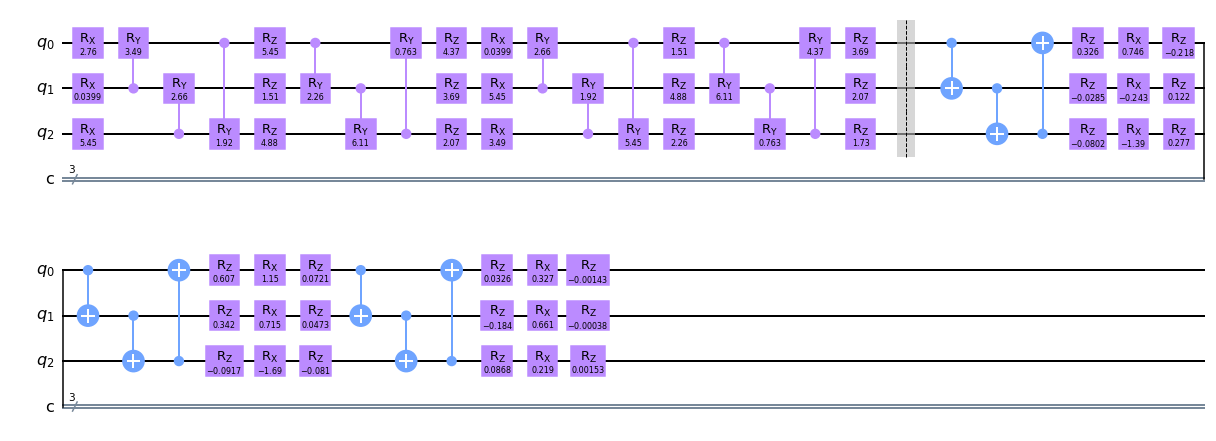

In [17]:
qc1.draw(output = 'mpl')